# **La motivación de este proyecto es, a través de varios valores diagnosticos y características de la población, conocer si tiene o no diabetes, e incluso poder anticipar un posible positivo.**

Este conjunto de datos procede del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir diagnósticamente si un paciente tiene diabetes
basándose en determinadas mediciones diagnósticas incluidas en el conjunto de datos. En particular, todos los pacientes aquí son mujeres
de al menos 21 años y de ascendencia india.

Para este proyecto, tendremos en cuenta los siguientes valores:

  Embarazos: Número de embarazos

  Glucosa: Para expresar el nivel de glucosa en sangre. Valores normales 70-100 mg/dL

  Presión arterial. Valores normales 80-120 mmHg (milimetros de mercurio)

  Grosor de la piel

  Insulina: para expresar el nivel de insulina en sangre. Valores normales - 50-250 µIU/mL

  IMC: para expresar el índice de masa corporal. IMC = Peso (KG) / Altura (m)2. Valores normales entre 18 y 25.

  Diabetes Pedigree Function: Evalúa la probabilidad de tener diabetes según la historia familiar. (%)

  Edad.

  Resultado: Para expresar el resultado final 1 = Sí y 0 = No


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

# Normalizacion
from sklearn.preprocessing import MinMaxScaler

# Train, Test
from sklearn.model_selection import train_test_split

# Metricas
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("diabetes.csv", sep = ",")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#Revisamos nulos (al ser valores numericos no hay)
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
#En el contexto médico, hay columnas que no deberían ser = 0
columnas_con_ceros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Contar la cantidad de valores de 0 en la columna actual
for column in columnas_con_ceros:

    cantidad_ceros = (df[column] == 0).sum()
    print(f"Cantidad de valores de 0 en la columna {column}: {cantidad_ceros}")


Cantidad de valores de 0 en la columna Glucose: 5
Cantidad de valores de 0 en la columna BloodPressure: 35
Cantidad de valores de 0 en la columna SkinThickness: 227
Cantidad de valores de 0 en la columna Insulin: 374
Cantidad de valores de 0 en la columna BMI: 11


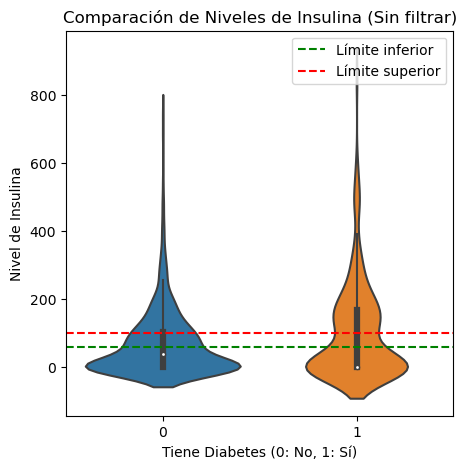

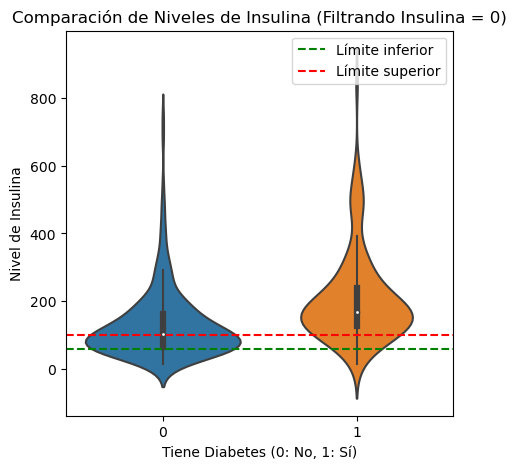

In [9]:
#Revisamos si la insulina tiene relación directa con si el paciente es diabético o no
#Indicamos el rango de valores normales en una persona sana 60-100mg/dL

# Gráfico 1: Comparación de insulina con si tiene diabetes o no (sin filtrar los valores de insulina = 0)
plt.figure(figsize=(5, 5))
sns.violinplot(x="Outcome", y="Insulin", data=df)
plt.title("Comparación de Niveles de Insulina (Sin filtrar)")
plt.xlabel("Tiene Diabetes (0: No, 1: Sí)")
plt.ylabel("Nivel de Insulina")
plt.axhline(y=60, color="green", linestyle="--", label="Límite inferior")
plt.axhline(y=100, color="red", linestyle="--", label="Límite superior")
plt.legend()
plt.show()

# Gráfico 2: Comparación de insulina con si tiene diabetes o no (filtrando los valores de insulina = 0)
df_filtrado = df[df["Insulin"] != 0]
plt.figure(figsize=(5, 5))
sns.violinplot(x="Outcome", y="Insulin", data=df_filtrado)
plt.title("Comparación de Niveles de Insulina (Filtrando Insulina = 0)")
plt.xlabel("Tiene Diabetes (0: No, 1: Sí)")
plt.ylabel("Nivel de Insulina")
plt.axhline(y=60, color="green", linestyle="--", label="Límite inferior")
plt.axhline(y=100, color="red", linestyle="--", label="Límite superior")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


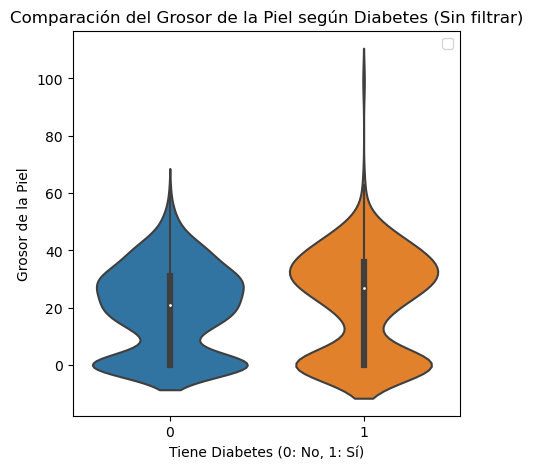

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


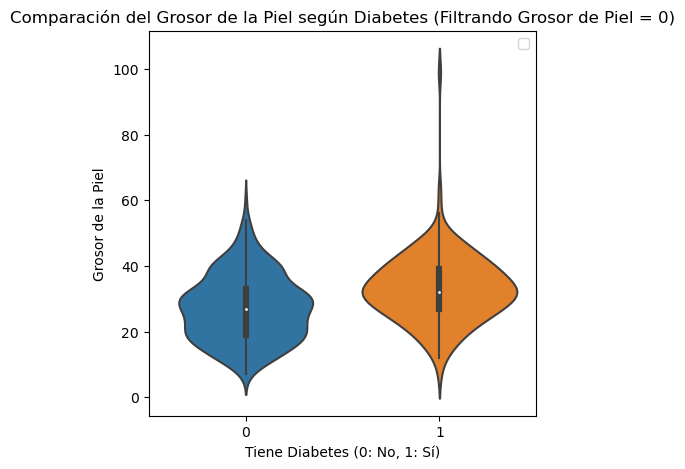

In [10]:
# Gráfico 1: Comparación del grosor de la piel con si tiene diabetes o no
plt.figure(figsize=(5, 5))
sns.violinplot(x="Outcome", y="SkinThickness", data=df)
plt.title("Comparación del Grosor de la Piel según Diabetes (Sin filtrar)")
plt.xlabel("Tiene Diabetes (0: No, 1: Sí)")
plt.ylabel("Grosor de la Piel")
plt.legend()
plt.show()

# Filtrar el DataFrame para excluir los valores de grosor de piel igual a cero
df_filtrado_skinthickness = df[df["SkinThickness"] != 0]

# Gráfico 2: Comparación del grosor de la piel con si tiene diabetes o no (filtrando los valores de grosor de piel igual a cero)
plt.figure(figsize=(5, 5))
sns.violinplot(x="Outcome", y="SkinThickness", data=df_filtrado_skinthickness)
plt.title("Comparación del Grosor de la Piel según Diabetes (Filtrando Grosor de Piel = 0)")
plt.xlabel("Tiene Diabetes (0: No, 1: Sí)")
plt.ylabel("Grosor de la Piel")
plt.legend()
plt.show()

In [11]:
#Viendo las gráficas, llegamos a la conclusión de que la insulina si puede ser un indicador importante a tener en cuenta
#Podemos prescindir del grosor de la piel

df = df.drop(columns=["SkinThickness"])


In [12]:
#También eliminamos las demas filas con valor = 0 de las otras columnas revisadas anterioremente
df = df.loc[(df["Glucose"] != 0) & (df["BloodPressure"] != 0) & (df["BMI"] != 0)]

In [13]:
#Reseteamos el indice
df.reset_index(drop=True, inplace=True)
df

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
719,10,101,76,180,32.9,0.171,63,0
720,2,122,70,0,36.8,0.340,27,0
721,5,121,72,112,26.2,0.245,30,0
722,1,126,60,0,30.1,0.349,47,1


In [14]:
media_diabetes = df[df["Outcome"] == 1]["Insulin"].mean()
media_no_diabetes = df[df["Outcome"] == 0]["Insulin"].mean()


In [15]:
df.loc[(df["Insulin"] == 0) & (df["Outcome"] == 1), "Insulin"] = media_diabetes
df.loc[(df["Insulin"] == 0) & (df["Outcome"] == 0), "Insulin"] = media_no_diabetes

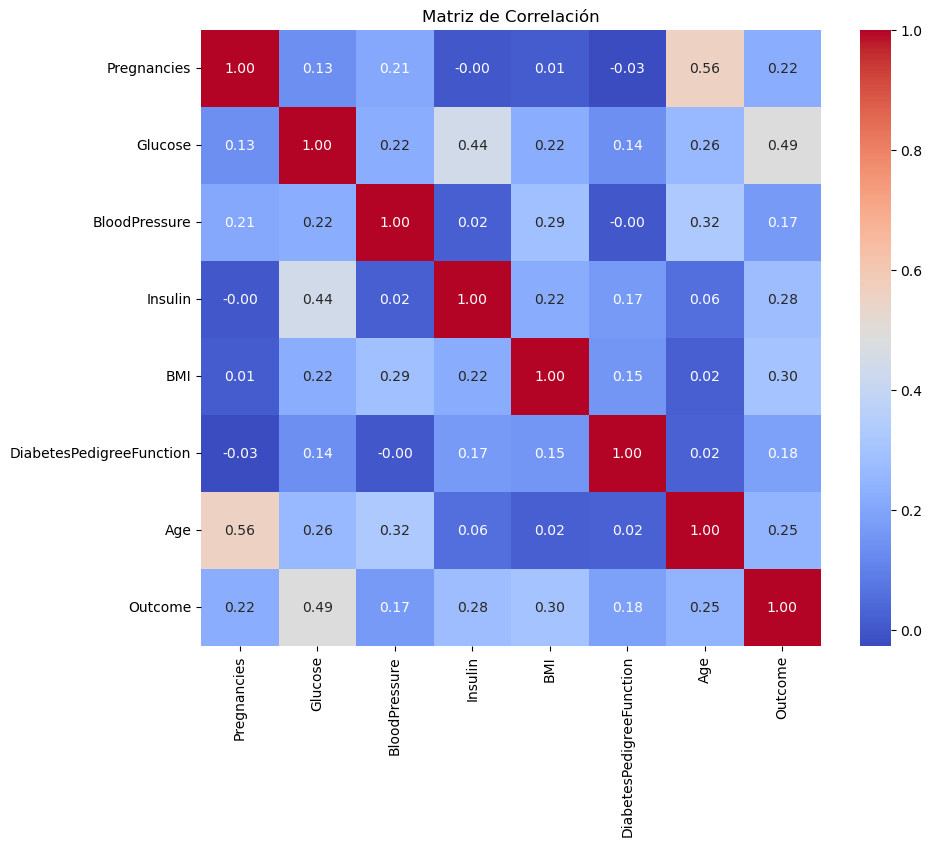

In [16]:
# Echamos un vistazo a la correlación entre las columnas
matriz_correlacion = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

In [17]:
#Prescindimos de la columna BloodPressure y de DiabetesPedigreeFunction porque no tienen una gran correlación con Outcome

df.drop(columns=["BloodPressure", "DiabetesPedigreeFunction"], inplace=True)


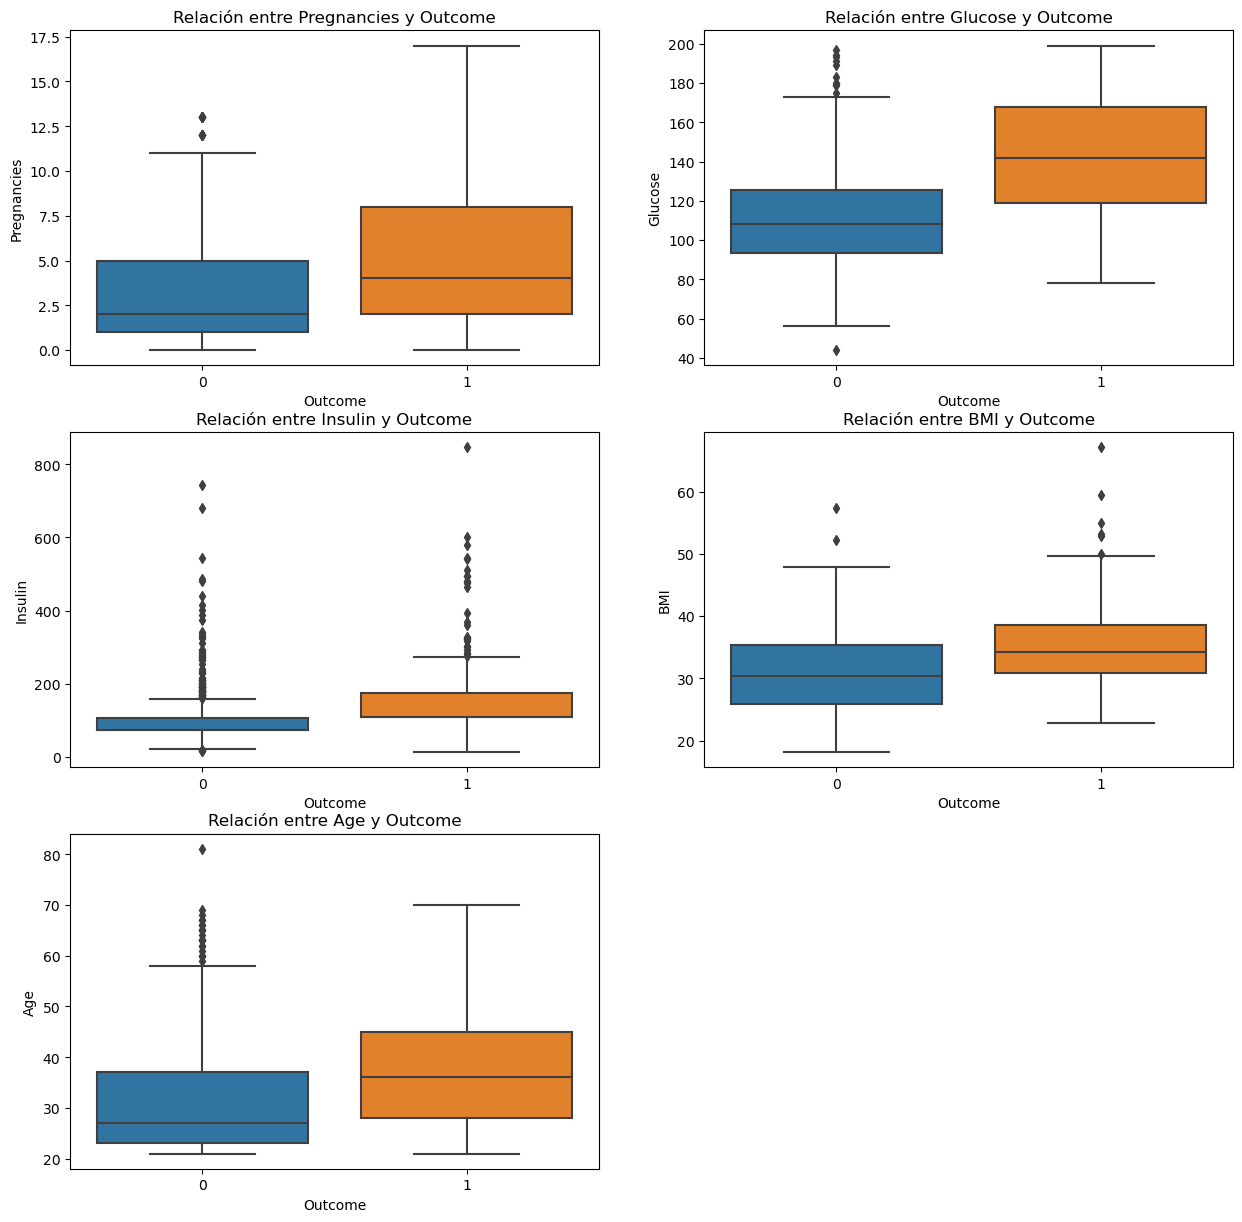

In [18]:
# Lista de columnas para comparar con 'Outcome' y ver outliers
columns_para_outliers = ["Pregnancies", "Glucose", "Insulin", "BMI", "Age"]

# Creo una figura y ejes para subplots
plt.figure(figsize=(15, 20))

# Bucle a través de las columnas y creo un gráfico de caja y bigotes para cada una
for i, column in enumerate(columns_para_outliers, 1):
    plt.subplot(4, 2, i)  # Crear un subplot (4 filas, 2 columnas, i-ésimo gráfico)
    sns.boxplot(x="Outcome", y=column, data=df)
    plt.title(f"Relación entre {column} y Outcome")
    plt.xlabel("Outcome")
    plt.ylabel(column)

plt.show()

In [19]:
# Definimos las columnas para las que quieres eliminar los outliers
columnas = ["Pregnancies", "Glucose", "Insulin", "BMI"]

# Función para eliminar outliers usando el método IQR
def eliminar_outliers(df, columnas):
    for columna in columnas:
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        df = df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]
    return df

df = eliminar_outliers(df, columnas)

df


,Pregnancies,Glucose,Insulin,BMI,Age,Outcome
0,6,148,107.991968,33.6,50,1
1,1,85,72.176842,26.6,31,0
2,8,183,107.991968,23.3,32,1
3,1,89,94.000000,28.1,21,0
4,0,137,168.000000,43.1,33,1
...,...,...,...,...,...,...
719,10,101,180.000000,32.9,63,0
720,2,122,72.176842,36.8,27,0
721,5,121,112.000000,26.2,30,0
722,1,126,107.991968,30.1,47,1


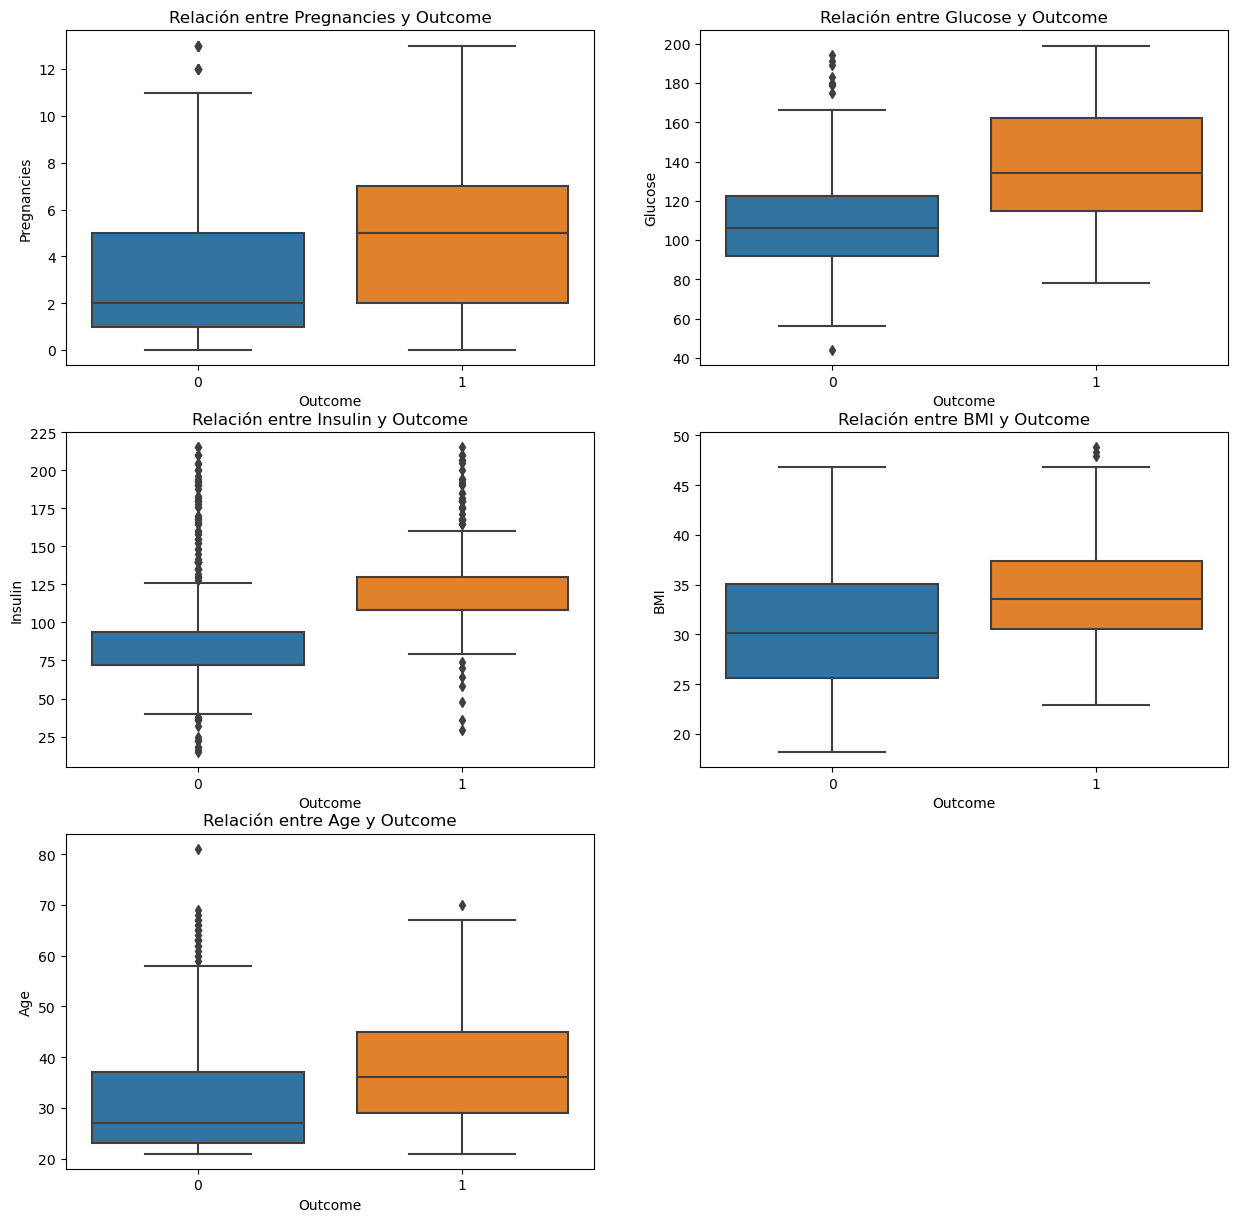

In [20]:
#Revisamos de nuevo outliers y lo damos por bueno para hacer ya el modelo
plt.figure(figsize=(15, 20))

for i, column in enumerate(columns_para_outliers, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x="Outcome", y=column, data=df)
    plt.title(f"Relación entre {column} y Outcome")
    plt.xlabel("Outcome")
    plt.ylabel(column)

plt.show()

In [21]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [22]:
# Normalización de datos

x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)

X

array([[0.46153846, 0.67096774, 0.46495984, 0.50326797, 0.48333333],
       [0.07692308, 0.26451613, 0.28588421, 0.2745098 , 0.16666667],
       [0.61538462, 0.89677419, 0.46495984, 0.16666667, 0.18333333],
       ...,
       [0.38461538, 0.49677419, 0.485     , 0.26143791, 0.15      ],
       [0.07692308, 0.52903226, 0.46495984, 0.38888889, 0.43333333],
       [0.07692308, 0.31612903, 0.28588421, 0.39869281, 0.03333333]])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

X_train: (448, 5), y_train: (448,)
X_test: (192, 5),  y_test: (192,)


In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
yhat = model.predict(X_test)

yhat

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0], dtype=int64)

In [27]:
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

Jaccard Index: 0.795417432129006
Accuracy: 0.9010416666666666
Precisión: 0.886134828596916
Sensibilidad: 0.8825757575757576
F1-score: 0.8843190106231171


In [28]:
confusion_matrix(y_test, yhat)

array([[123,   9],
       [ 10,  50]], dtype=int64)

In [29]:
print(classification_report(y_test, yhat, digits = 2))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       132
           1       0.85      0.83      0.84        60

    accuracy                           0.90       192
   macro avg       0.89      0.88      0.88       192
weighted avg       0.90      0.90      0.90       192



In [30]:
model.predict_proba(X_test)

array([[0.73, 0.27],
       [0.99, 0.01],
       [0.8 , 0.2 ],
       [0.53, 0.47],
       [0.39, 0.61],
       [0.73, 0.27],
       [0.46, 0.54],
       [0.95, 0.05],
       [0.44, 0.56],
       [0.02, 0.98],
       [0.68, 0.32],
       [0.02, 0.98],
       [0.37, 0.63],
       [0.73, 0.27],
       [0.98, 0.02],
       [0.95, 0.05],
       [0.09, 0.91],
       [0.98, 0.02],
       [0.09, 0.91],
       [0.97, 0.03],
       [0.17, 0.83],
       [0.9 , 0.1 ],
       [0.67, 0.33],
       [0.95, 0.05],
       [0.84, 0.16],
       [0.93, 0.07],
       [0.98, 0.02],
       [0.92, 0.08],
       [1.  , 0.  ],
       [0.24, 0.76],
       [0.96, 0.04],
       [0.36, 0.64],
       [1.  , 0.  ],
       [0.16, 0.84],
       [1.  , 0.  ],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.37, 0.63],
       [0.11, 0.89],
       [0.45, 0.55],
       [0.21, 0.79],
       [0.97, 0.03],
       [0.02, 0.98],
       [0.98, 0.02],
       [0.93, 0.07],
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.36,

In [31]:
model.feature_importances_

array([0.06464864, 0.17496771, 0.53047814, 0.10103526, 0.12887025])

In [32]:
for col, imp in zip(df.drop("Outcome", axis=1).columns, model.feature_importances_):
    print(f"Columna: {col} Importancia: {imp}")

Columna: Pregnancies Importancia: 0.06464864054713663
Columna: Glucose Importancia: 0.17496771036057213
Columna: Insulin Importancia: 0.5304781413843965
Columna: BMI Importancia: 0.10103525667956076
Columna: Age Importancia: 0.12887025102833383


In [33]:
print(model.estimators_[0].feature_importances_)
print(model.estimators_[0].get_depth())
print(model.estimators_[0].get_n_leaves())

[0.01439492 0.11173264 0.62283056 0.05387826 0.19716363]
10
38


Counter({10: 33, 11: 30, 9: 19, 12: 13, 13: 3, 8: 1, 15: 1})


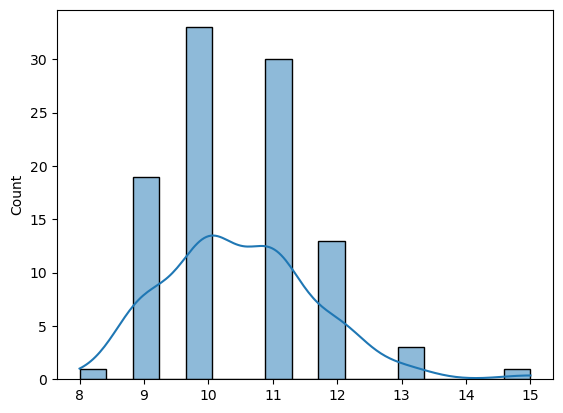

In [34]:
# Max depth
from collections import Counter

print(Counter([x.get_depth() for x in model.estimators_]))


import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot([x.get_depth() for x in model.estimators_], kde = True)
plt.show()

Counter({50: 8, 38: 7, 43: 7, 42: 7, 41: 5, 40: 5, 51: 5, 46: 5, 48: 5, 49: 5, 44: 5, 45: 4, 55: 4, 52: 3, 57: 3, 53: 3, 39: 3, 36: 3, 61: 2, 58: 2, 37: 2, 56: 2, 65: 1, 47: 1, 59: 1, 28: 1, 30: 1})


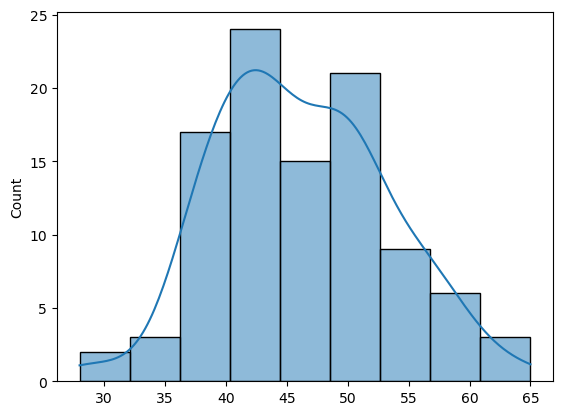

In [35]:
# N Leaves
from collections import Counter

print(Counter([x.get_n_leaves() for x in model.estimators_]))


import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot([x.get_n_leaves() for x in model.estimators_], kde = True)
plt.show()

In [36]:
print(f"Estimador Base: {model.base_estimator}")

print("*"*100)

for num, estimador in enumerate(model.estimators_):
    print(f"Estimador {num}: {estimador}")

print(f"Numero de estimadores: {len(model.estimators_)}")

Estimador Base: deprecated
****************************************************************************************************
Estimador 0: DecisionTreeClassifier(max_features='sqrt', random_state=1982940742)
Estimador 1: DecisionTreeClassifier(max_features='sqrt', random_state=1740196832)
Estimador 2: DecisionTreeClassifier(max_features='sqrt', random_state=1528726347)
Estimador 3: DecisionTreeClassifier(max_features='sqrt', random_state=1157516575)
Estimador 4: DecisionTreeClassifier(max_features='sqrt', random_state=233340590)
Estimador 5: DecisionTreeClassifier(max_features='sqrt', random_state=218162759)
Estimador 6: DecisionTreeClassifier(max_features='sqrt', random_state=328471995)
Estimador 7: DecisionTreeClassifier(max_features='sqrt', random_state=942354345)
Estimador 8: DecisionTreeClassifier(max_features='sqrt', random_state=2068845142)
Estimador 9: DecisionTreeClassifier(max_features='sqrt', random_state=1873556658)
Estimador 10: DecisionTreeClassifier(max_features='sqrt'

In [ ]:
"""%%time

model = RandomForestClassifier()

params = {"n_estimators"           : [100, 150, 200], # Numero de arboles
          "criterion"              : ["gini", "entropy"], # Es la función para medir la calidad de una división/split.
          "max_depth"              : range(12, 25, 3), # La profundidad máxima del árbol.
          "max_features"           : ["sqrt", "log2", None], # El número de características (atributos) a considerar en cada split
          "max_leaf_nodes"         : range(90, 151, 10), # Maximo de nodos hoja del arbol
          "min_impurity_decrease"  : [0.0, 0.1, 0.2, 0.3], # Un nodo se dividirá si esta división induce una disminución de la impureza mayor o igual a este valor.
          "min_samples_split"      : [2, 10, 15, 20], # El número mínimo de muestras requeridas para llegar a nodo hoja.
          "random_state"           : [42]}

scorers = ["f1_macro", "accuracy", "recall_macro"]

grid_solver = GridSearchCV(estimator  = model     ,
                           param_grid = params    ,
                           scoring    = scorers   ,
                           cv         = 5         ,
                           refit      = "accuracy",
                           n_jobs     = -1        ,
                           verbose    = 3)

model_result = grid_solver.fit(X, y)

print(model_result.cv_results_["mean_test_recall_macro"].mean())
print(model_result.cv_results_["mean_test_f1_macro"].mean())
print(model_result.cv_results_["mean_test_accuracy"].mean())

print("*"*100)

print(model_result.best_score_)
print(model_result.best_params_)"""

'%%time\n\nmodel = RandomForestClassifier()\n\nparams = {"n_estimators"           : [100, 150, 200], # Numero de arboles\n          "criterion"              : ["gini", "entropy"], # Es la función para medir la calidad de una división/split.\n          "max_depth"              : range(12, 25, 3), # La profundidad máxima del árbol.\n          "max_features"           : ["sqrt", "log2", None], # El número de características (atributos) a considerar en cada split\n          "max_leaf_nodes"         : range(90, 151, 10), # Maximo de nodos hoja del arbol\n          "min_impurity_decrease"  : [0.0, 0.1, 0.2, 0.3], # Un nodo se dividirá si esta división induce una disminución de la impureza mayor o igual a este valor.\n          "min_samples_split"      : [2, 10, 15, 20], # El número mínimo de muestras requeridas para llegar a nodo hoja.\n          "random_state"           : [42]}\n\nscorers = ["f1_macro", "accuracy", "recall_macro"]\n\ngrid_solver = GridSearchCV(estimator  = model     ,\n    

In [ ]:
#Con los resultados obtenidos, considero que no necesitamos ajustar el modelo con otros parámetros